In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit

pressures = [40, 82, 119, 160, 201]

ATM = 751
T = 299
MuHe = 4 * 10**(-3)
R = 8.31
kBolts = 1.38 * 10**(-23)

dp = 3

titles = ["P, торр", "dP, торр", "D", "dD"]

data = []

for pressure in pressures:
    file_name = "mnk{}.csv".format(pressure)
    data_table = pd.read_csv(file_name).to_numpy()

    D = data_table[0, 0]
    dD = data_table[0, 1]

    data.append([pressure, dp, D, dD])

results = pd.DataFrame(data, columns = titles)
results.to_csv("D(p).csv", index = False)


In [63]:
def make_plot():
    global ATM, T, MuHe, R, kBolts

    file_name = "D(p).csv"
    data_table = pd.read_csv(file_name).to_numpy()

    x_raw = data_table[:, 0]
    x = [1 / i * 1000 for i in x_raw]
    y = data_table[:, 2]

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(r"График зависимости $D(1/P)$")
    plt.ylabel(r"$D, см^2 / c$")
    plt.xlabel(r"$1/P, торр^{-1} * 10^{-3}$")

    def func(x, k, b):
        return x * k + b

    popt, pcov = curve_fit(func, x, y)
    k, b = popt
    dk, db = np.sqrt(np.diag(pcov))

    x_lin = np.linspace(0, x[0] + 1, 1000)
    plt.plot(x_lin, func(x_lin, k, b), "b", label = "Линейная аппроксимация")
    plt.errorbar(x, y, markersize = 15, fmt = 'r.', markerfacecolor = 'r', label = 'Экспериментальные значения')
    plt.errorbar(1 / ATM * 1000, 0.62, markersize = 15, fmt = 'g+', markerfacecolor = 'g', label = 'Табличное значение при атмосферном давлении')

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("../graphs/D(p^-1).png")
    plt.show()

    D_atm = func(1 / ATM * 1000, k, b)
    dD_atm = np.sqrt(D_atm**2 * ((dk / k)**2 + (3 / ATM)**2) + db**2)

    print("D_atm = {}".format(D_atm))

    print("dD_atm = {}".format(dD_atm))

    lambda_He = 3 * D_atm / 10**4 * np.sqrt(3.14 * MuHe / (8 * R * T))
    d_lambda = lambda_He * np.sqrt((dD_atm / D_atm)**2 + (1/2 * 0.1 / T)**2)

    sigma_He = kBolts * T / (ATM * lambda_He)
    d_sigma = sigma_He * np.sqrt((0.1/T)**2 + (3 / ATM)**2 + (d_lambda / lambda_He)**2)

    print("\\lamda_He = {} +- {}".format(lambda_He, d_lambda))
    print("\\sigma_He = {} +- {}".format(sigma_He, d_sigma))




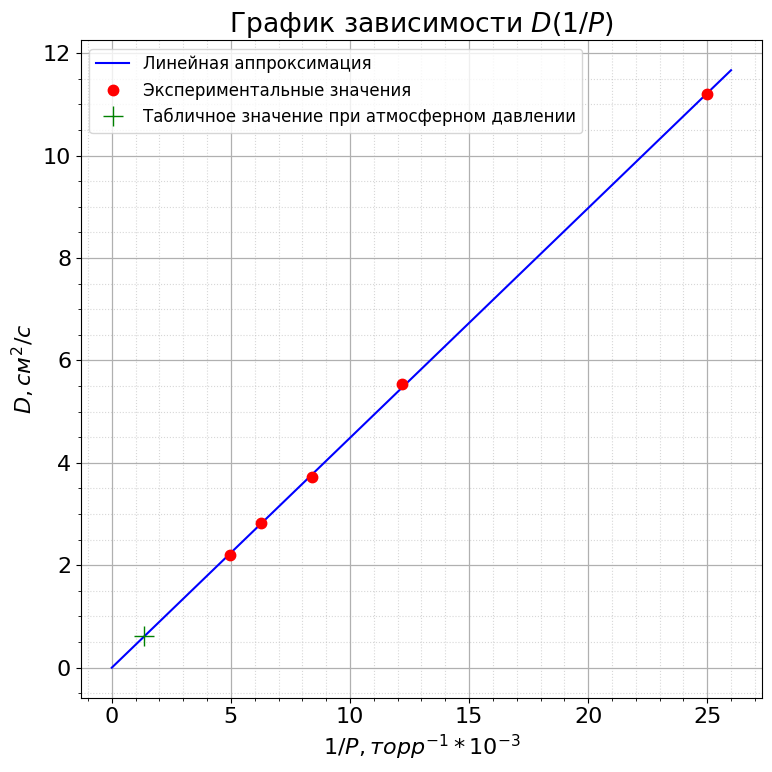

D_atm = 0.5970166387560734
dD_atm = 0.04410862391478546
\lamda_He = 1.4237095882360333e-07 +- 1.0518640113354046e-08
\sigma_He = 3.8591257278385396e-17 +- 2.8553899741205927e-18


In [64]:
make_plot()